In [91]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import copy, deepcopy
from operator import itemgetter

In [2]:
g=nx.Graph()

with open("static.network") as file:
    data = file.read().split('\n')
    #print(data[0])
    for i in range(1,len(data)):
        nodes=data[i].split(' ')
        if len(nodes)==2:
            g.add_edge(int(nodes[0]),int(nodes[1]))
        
#print(nx.number_of_nodes(g))
total_node=nx.number_of_nodes(g)
adj=[[0 for _ in range(total_node)] for _ in range(total_node)]
#print (len(nx.edges(g)))
for i in nx.edges(g):
    adj[i[0]][i[1]]=1
    adj[i[1]][i[0]]=1
eigenvalue, eigenvector = np.linalg.eig(adj)
#print(eigenvalue)
#print(eigenvector)

In [3]:
eig_set=[(eigenvalue[i],eigenvector[i]) for i in range(len(eigenvalue))]
eig_set=sorted(eig_set,key=lambda x:x[0],reverse=1)

1


In [4]:
beta1=0.2
beta2=0.01
delta1=0.7
delta2=0.6
Cvpm1=beta1/delta1
Cvpm2=beta2/delta2

In [5]:
largest_eigenvalue=eig_set[0][0].real

#print(largest_eigenvalue)
s1=largest_eigenvalue*Cvpm1
print(s1)
s2=largest_eigenvalue*Cvpm2
print(s2)

12.529913074498449
0.7309115960124094


0.016


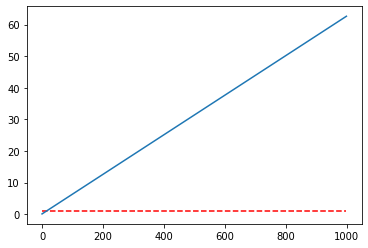

In [6]:
static_delta1=[]
flag=0
for i in range(1,1001):
    tmp_beta=float(i)/1000
    #print(tmp_beta)
    tmp_Cvpm=tmp_beta/delta1
    current=largest_eigenvalue*tmp_Cvpm
    if current>1 and flag==0:
        print (tmp_beta)
        flag=1
    static_delta1.append(current)
    #print(largest_eigenvalue,tmp_Cvpm,current)
#print(static_delta)
threshold = np.array([1 for i in range(1000)])
plt.plot(threshold, 'r--') 
plt.plot(static_delta1)

plt.show()

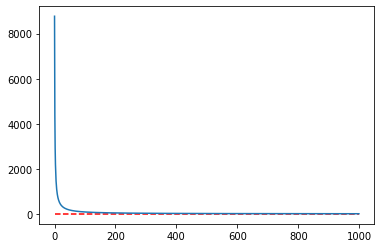

In [7]:
static_beta1=[]
flag=0
for i in range(1,1001):
    tmp_delta=float(i)/1000
    tmp_Cvpm=beta1/tmp_delta
    current=largest_eigenvalue*tmp_Cvpm
    if current<1 and flag==0:
        print (tmp_delta)
        flag=1
    static_beta1.append(current)
#print(static_beta1)
threshold = np.array([1 for i in range(1000)])
plt.plot(threshold, 'r--') 
plt.plot(static_beta1)
plt.show()

0.014


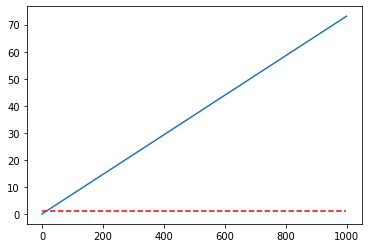

In [8]:
static_delta2=[]
flag=0
for i in range(1,1001):
    tmp_beta=float(i)/1000
    tmp_Cvpm=tmp_beta/delta2
    current=largest_eigenvalue*tmp_Cvpm
    if current>1 and flag==0:
        print (tmp_beta)
        flag=1
    static_delta2.append(current)
threshold = np.array([1 for i in range(1000)])
plt.plot(threshold, 'r--') 
plt.plot(static_delta2)

plt.show()

0.439


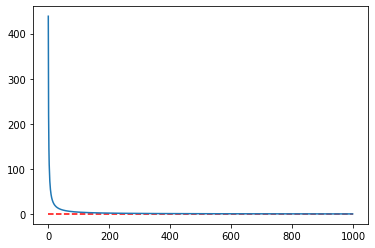

In [9]:
static_beta2=[]
flag=0
for i in range(1,1001):
    tmp_delta=float(i)/1000
    
    tmp_Cvpm=beta2/tmp_delta
    current=largest_eigenvalue*tmp_Cvpm
    #print(current,tmp_delta)
    if current<1 and flag==0:
        print (tmp_delta)
        flag=1
    static_beta2.append(current)

threshold = np.array([1 for i in range(1000)])
plt.plot(threshold, 'r--') 
plt.plot(static_beta2)
plt.show()

In [10]:
c=int(total_node/10)
t=100
def simulate(beta,delta,adj,t,c):
    infect=[False for _ in range(total_node)]
    infect_ind=[]
    while len(infect_ind)<c:
        r=random.randint(0, total_node-1)
        if infect[r]==False:
            infect[r]=True
            infect_ind.append(r)

    infect_num=[]
    infect_num.append(len(infect_ind))

    for i in range(t):
        cur_infect=set()
        cur_cure=[]
        for inf in infect_ind:
            #print(inf)
            for j in range(len(adj[inf])):
                if adj[inf][j]==1 and float(random.randint(1, 10))/10<beta:
                    cur_infect.add(j)
            if float(random.randint(1, 10))/10<delta:
                cur_cure.append(inf)
            else:
                cur_infect.add(inf)
        
        for node in cur_cure:
            infect[node]=False
        for node in cur_infect:
            infect[node]=True
        infect_num.append(len(cur_infect))
        infect_ind=cur_infect
        #print(i,len(infect_ind))
    return infect_num
                

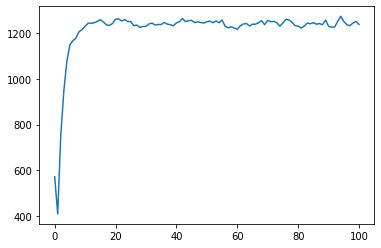

In [11]:

first_series=[]
for i in range(10):
    res=simulate(beta1,delta1,adj,t,c)
    first_series.append(res)
first_series=np.array(first_series)
first_series=np.mean(first_series, axis=0)
#print(first_series)
plt.plot(first_series)
plt.show()


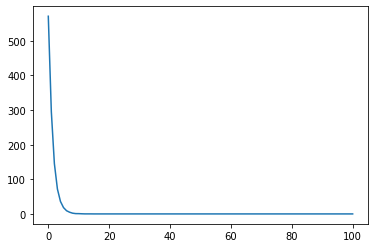

In [12]:
second_series=[]
for i in range(10):
    res=simulate(beta2,delta2,adj,t,c)
    second_series.append(res)
second_series=np.array(second_series)
second_series=np.mean(second_series, axis=0)
#print(second_series)
plt.plot(second_series)
plt.show()

In [13]:
def policyA(beta,delta,adj,t,c,k):
    immun=set()
    while len(immun)<k:
        r=random.randint(0, total_node-1)
        if r not in immun:
            immun.add(r)
    
    
    infect=[False for _ in range(total_node)]
    infect_ind=[]
    while len(infect_ind)<c:
        r=random.randint(0, total_node-1)
        if infect[r]==False and r not in immun:
            infect[r]=True
            infect_ind.append(r)

    infect_num=[]
    infect_num.append(len(infect_ind))
    #print(set(infect_ind).intersection(immun))
    #print(immun)
    for i in range(t):
        cur_infect=set()
        cur_cure=[]
        #print(set(infect_ind).intersection(immun))
        for inf in infect_ind:
            #print(inf)
            for j in range(len(adj[inf])):
                if adj[inf][j]==1 and float(random.randint(1, 10))/10<beta and j not in immun:
                    cur_infect.add(j)
            if float(random.randint(1, 10))/10<delta:
                cur_cure.append(inf)
            else:
                cur_infect.add(inf)
        
        for node in cur_cure:
            infect[node]=False
        for node in cur_infect:
            infect[node]=True
        infect_num.append(len(cur_infect))
        infect_ind=cur_infect
        #print(i,len(infect_ind))
    return infect_num
    
    

In [14]:
adjA=[[0 for _ in range(total_node)] for _ in range(total_node)]
for i in nx.edges(g):
    adjA[i[0]][i[1]]=1
    adjA[i[1]][i[0]]=1
    
immun=set()
while len(immun)<200:
    r=random.randint(0, total_node-1)
    if r not in immun:
        immun.add(r)
for node in immun:    
    for i in range(len(adjA[node])):
        adjA[node][i]=0
        adjA[i][node]=0
        
eigenvalueA, eigenvectorA = np.linalg.eig(adjA)
eig_setA=[(eigenvalueA[i],eigenvectorA[i]) for i in range(len(eigenvalueA))]
eig_setA=sorted(eig_setA,key=lambda x:x[0],reverse=1)
largest_eigenvalueA=eig_setA[0][0].real
sA=largest_eigenvalueA*Cvpm1
print(sA)

10.01557181057754


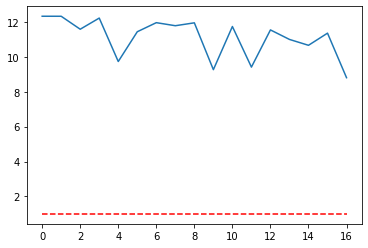

In [18]:

def immunA(k,adj):
    immun=set()
    while len(immun)<k:
        r=random.randint(0, total_node-1)
        if r not in immun:
            immun.add(r)
    
    for node in immun:    
        for i in range(len(adj[node])):
            adj[node][i]=0
            adj[i][node]=0
    return adj

static_beta_delta_A=[]
flag=0
for i in range(200,1001,50):
    tmp = deepcopy(adj)
    new_adj=immunA(i,tmp)
    val, vec = np.linalg.eig(new_adj)
    e=[(val[i],vec[i]) for i in range(len(val))]
    e=sorted(e,key=lambda x:x[0],reverse=1)
    le=e[0][0].real
    strength=le*Cvpm1
    #print(strength)
    if strength<1 and flag==0:
        print (i)
        flag=1
        break
    static_beta_delta_A.append(strength)

threshold = np.array([1 for i in range(len(static_beta_delta_A))])
plt.plot(threshold, 'r--') 
plt.plot(static_beta_delta_A)
plt.show()

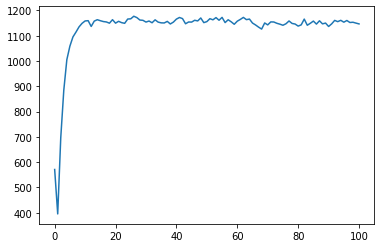

In [17]:
policy_A=[]
for i in range(10):
    res=policyA(beta1,delta1,adj,t,c,200)
    policy_A.append(res)
policy_A=np.array(policy_A)
policy_A=np.mean(policy_A, axis=0)
#print(policy_A)
plt.plot(policy_A)
plt.show()

In [85]:
def policyB(beta,delta,adj,t,c,k,g):
    
    infect=[False for _ in range(total_node)]
    infect_ind=set()
    while len(infect_ind)<c:
        r=random.randint(0, total_node-1)
        if infect[r]==False:
            infect[r]=True
            infect_ind.add(r)
    
    
    
    immun=set()
    degree=sorted(list(g.degree()),key=lambda x:x[1],reverse=1)
    for i in range(k):
        immun.add(degree[i][0])
    tmp_g=nx.Graph(g)
    for i in immun:
        tmp_g.remove_node(i)
    
    adjB=[[0 for _ in range(total_node)] for _ in range(total_node)]
    for i in nx.edges(tmp_g):
        adjB[i[0]][i[1]]=1
        adjB[i[1]][i[0]]=1
    for i in immun:
        if i in infect_ind:
            infect[i]=False
            infect_ind.remove(i)
    
    

    infect_num=[]
    infect_num.append(len(infect_ind))
    #print(set(infect_ind).intersection(immun))
    #print(immun)
    for i in range(t):
        cur_infect=set()
        cur_cure=set()
        #print(set(infect_ind).intersection(immun))
        for inf in infect_ind:
            #print(inf)
            for j in range(len(adj[inf])):
                if adjB[inf][j]==1 and random.random()<beta and j not in immun:
                    cur_infect.add(j)
            if random.random()<delta:
                cur_cure.add(inf)
            else:
                cur_infect.add(inf)
        
        for node in cur_cure:
            infect[node]=False
        for node in cur_infect:
            infect[node]=True
        infect_num.append(len(cur_infect))
        infect_ind=cur_infect
        #print(i,len(infect_ind))
    return infect_num
    
    

In [71]:
   
immun=set()
degree=sorted(list(g.degree()),key=lambda x:x[1],reverse=1)
for i in range(200):
    immun.add(degree[i][0])
tmp_g=nx.Graph(g)
for i in immun:
    tmp_g.remove_node(i)

adjB=[[0 for _ in range(total_node)] for _ in range(total_node)]
for i in nx.edges(tmp_g):
    adjB[i[0]][i[1]]=1
    adjB[i[1]][i[0]]=1

#print(len(nx.edges(tmp_g)))
#print(sorted(list(tmp_g.degree()),key=lambda x:x[1],reverse=1))
        
eigenvalueB, eigenvectorB = np.linalg.eig(adjB)
eig_setB=[(eigenvalueB[i],eigenvectorB[i]) for i in range(len(eigenvalueB))]
eig_setB=sorted(eig_setB,key=lambda x:x[0],reverse=1)

largest_eigenvalueB=eig_setB[0][0].real

sB=largest_eigenvalueB*Cvpm1
print(sB)

1.0802754802352357


300


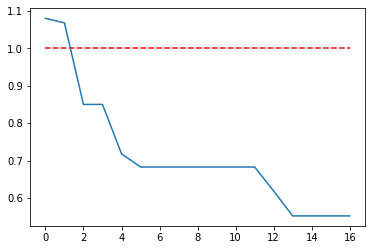

In [40]:
def immunB(k,adj,g):
    
    immun=set()
    degree=sorted(list(g.degree()),key=lambda x:x[1],reverse=1)
    for i in range(k):
        immun.add(degree[i][0])
    
    for node in immun:    
        for i in range(len(adj[node])):
            adj[node][i]=0
            adj[i][node]=0
    return adj

static_beta_delta_B=[]
flag=0
for i in range(200,1001,50):
    tmp = deepcopy(adj)
    new_adj=immunB(i,tmp,g)
    val, vec = np.linalg.eig(new_adj)
    e=[(val[i],vec[i]) for i in range(len(val))]
    e=sorted(e,key=lambda x:x[0],reverse=1)
    le=e[0][0].real
    strength=le*Cvpm1
    #print(strength)
    if strength<1 and flag==0:
        print (i)
        flag=1
    static_beta_delta_B.append(strength)

threshold = np.array([1 for i in range(len(static_beta_delta_B))])
plt.plot(threshold, 'r--') 
plt.plot(static_beta_delta_B)
plt.show()

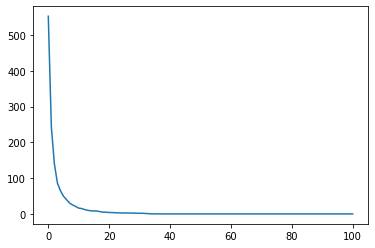

In [86]:
policy_B=[]
for i in range(10):
    res=policyB(beta1,delta1,adj,t,c,200,g)
    policy_B.append(res)
policy_B=np.array(policy_B)
policy_B=np.mean(policy_B, axis=0)
#print(policy_A)
plt.plot(policy_B)
plt.show()

In [75]:
def policyC(beta,delta,adj,t,c,k,g):
    immun=set()
    while len(immun)<k:
        degree=sorted(list(g.degree()),key=lambda x:x[1],reverse=1)
        immun.add(degree[0][0])
        g.remove_node(degree[0][0])
        
    
    
    infect=[False for _ in range(total_node)]
    infect_ind=[]
    while len(infect_ind)<c:
        r=random.randint(0, total_node-1)
        if infect[r]==False and r not in immun:
            infect[r]=True
            infect_ind.append(r)

    infect_num=[]
    infect_num.append(len(infect_ind))
    #print(set(infect_ind).intersection(immun))
    #print(immun)
    for i in range(t):
        cur_infect=set()
        cur_cure=[]
        #print(set(infect_ind).intersection(immun))
        for inf in infect_ind:
            #print(inf)
            for j in range(len(adj[inf])):
                if adj[inf][j]==1 and float(random.randint(1, 10))/10<beta and j not in immun:
                    cur_infect.add(j)
            if float(random.randint(1, 10))/10<delta:
                cur_cure.append(inf)
            else:
                cur_infect.add(inf)
        
        for node in cur_cure:
            infect[node]=False
        for node in cur_infect:
            infect[node]=True
        infect_num.append(len(cur_infect))
        infect_ind=cur_infect
        #print(i,len(infect_ind))
    return infect_num
    

In [80]:
tmp_g=nx.Graph(g)
immun=set()
while len(immun)<200:
    degree=sorted(list(tmp_g.degree()),key=lambda x:x[1],reverse=1)
    immun.add(degree[0][0])
    tmp_g.remove_node(degree[0][0])



adjC=[[0 for _ in range(total_node)] for _ in range(total_node)]
for i in nx.edges(tmp_g):
    adjC[i[0]][i[1]]=1
    adjC[i[1]][i[0]]=1



eigenvalueC, eigenvectorC = np.linalg.eig(adjC)
eig_setC=[(eigenvalueC[i],eigenvectorC[i]) for i in range(len(eigenvalueC))]
eig_setC=sorted(eig_setC,key=lambda x:x[0],reverse=1)

largest_eigenvalueC=eig_setC[0][0].real

sC=largest_eigenvalueC*Cvpm1
print(sC)

1.0845205395194293


240


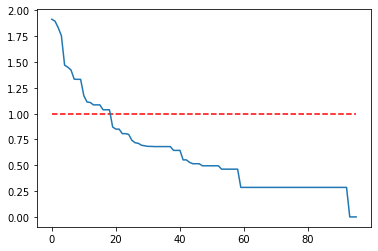

In [74]:
def immunC(k,adj,g):
    immun=set()
    tmp_g=nx.Graph(g)
    while len(immun)<k:
        degree=sorted(list(tmp_g.degree()),key=lambda x:x[1],reverse=1)
        immun.add(degree[0][0])
        tmp_g.remove_node(degree[0][0])
    
    adjC=[[0 for _ in range(total_node)] for _ in range(total_node)]
    for i in nx.edges(tmp_g):
        adjC[i[0]][i[1]]=1
        adjC[i[1]][i[0]]=1
    return adjC

static_beta_delta_C=[]
flag=0
for i in range(50,1001,10):
    tmp = deepcopy(adj)
    new_adj=immunC(i,tmp,g)
    val, vec = np.linalg.eig(new_adj)
    e=[(val[i],vec[i]) for i in range(len(val))]
    e=sorted(e,key=lambda x:x[0],reverse=1)
    le=e[0][0].real
    strength=le*Cvpm1
    #print(strength)
    if strength<1 and flag==0:
        print (i)
        flag=1
    static_beta_delta_C.append(strength)

threshold = np.array([1 for i in range(len(static_beta_delta_C))])
plt.plot(threshold, 'r--') 
plt.plot(static_beta_delta_C)
plt.show()

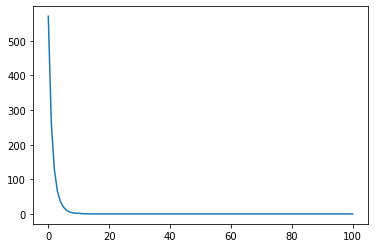

In [76]:
policy_C=[]
for i in range(10):
    G = nx.Graph(g)
    res=policyC(beta1,delta1,adj,t,c,200,G)
    policy_C.append(res)
policy_C=np.array(policy_C)
policy_C=np.mean(policy_C, axis=0)
#print(policy_A)
plt.plot(policy_C)
plt.show()

In [104]:
def policyD(beta,delta,adj,t,c,k,g,immun):
    
    infect=[False for _ in range(total_node)]
    infect_ind=set()
    while len(infect_ind)<c:
        r=random.randint(0, total_node-1)
        if infect[r]==False:
            infect[r]=True
            infect_ind.add(r)
    
    
    
    
    #print(len(immun),len(infect_ind))
    immun=set(immun)
    
    for inode in immun:
        if inode in infect_ind:
            infect[inode]=False
            infect_ind.remove(inode)
        

    

    infect_num=[]
    infect_num.append(len(infect_ind))
    #print(set(infect_ind).intersection(immun))
    #print(immun)
    for i in range(t):
        cur_infect=set()
        cur_cure=set()
        #print(set(infect_ind).intersection(immun))
        for inf in infect_ind:
            #print(inf)
            for j in range(len(adj[inf])):
                if adj[inf][j]==1 and random.random()<beta and j not in immun:
                    cur_infect.add(j)
            if random.random()<delta:
                cur_cure.add(inf)
            else:
                cur_infect.add(inf)
        
        for node in cur_cure:
            infect[node]=False
        for node in cur_infect:
            infect[node]=True
        infect_num.append(len(cur_infect))
        infect_ind=cur_infect
        #print(i,len(infect_ind))
    return infect_num
    

In [110]:
val, vec = np.linalg.eig(adj)
eig_set=[(val[i],vec[i]) for i in range(len(val))]
eig_set=sorted(eig_set,key=lambda x:x[0],reverse=1)
largest_vec=eig_set[0][1]
largest_vec=np.absolute(largest_vec)
immun = [u[0] for u in sorted(enumerate(largest_vec), reverse = True, key = itemgetter(1))[:200]]
immun=set(immun)

adjD=[[0 for _ in range(total_node)] for _ in range(total_node)]
for i in nx.edges(g):
    adjD[i[0]][i[1]]=1
    adjD[i[1]][i[0]]=1
for i in range(len(adjD)):
    if i in immun:
        for j in range(len(adjD[i])):
            adjD[i][j]=0
            adjD[j][i]=0
        
        
               
               


eigenvalueD, eigenvectorD = np.linalg.eig(adjD)
eig_setD=[(eigenvalueD[i],eigenvectorD[i]) for i in range(len(eigenvalueD))]
eig_setD=sorted(eig_setD,key=lambda x:x[0],reverse=1)

largest_eigenvalueD=eig_setD[0][0].real

sD=largest_eigenvalueD*Cvpm1
print(sD)

5.034783672655396


In [106]:
def immunD(adj,k):
    val, vec = np.linalg.eig(adj)
    eig_set=[(val[i],vec[i]) for i in range(len(val))]
    eig_set=sorted(eig_set,key=lambda x:x[0],reverse=1)
    largest_vec=eig_set[0][1]
    largest_vec=np.absolute(largest_vec)
    immun = [u[0] for u in sorted(enumerate(largest_vec), reverse = True, key = itemgetter(1))[:k]]
    return immun

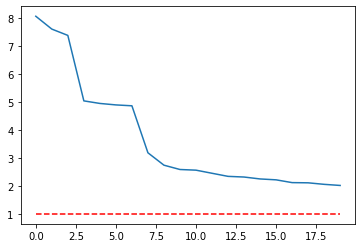

In [111]:
val, vec = np.linalg.eig(adj)
eig_set=[(val[i],vec[i]) for i in range(len(val))]
eig_set=sorted(eig_set,key=lambda x:x[0],reverse=1)
largest_vec=eig_set[0][1]
largest_vec=np.absolute(largest_vec)

def immuneD(k,adj,g,vec):
    target=[u[0] for u in sorted(enumerate(vec), reverse = True, key = itemgetter(1))[:k]]
    tmp_g=nx.Graph(g)
    for i in target:
        tmp_g.remove_node(i)
    adjD=[[0 for _ in range(total_node)] for _ in range(total_node)]
    for i in nx.edges(tmp_g):
        adjD[i[0]][i[1]]=1
        adjD[i[1]][i[0]]=1
    return adjD



static_beta_delta_D=[]
flag=0
for i in range(50,1001,50):
    tmp = deepcopy(adj)
    new_adj=immuneD(i,tmp,g,largest_vec)
    val, vec = np.linalg.eig(new_adj)
    e=[(val[i],vec[i]) for i in range(len(val))]
    e=sorted(e,key=lambda x:x[0],reverse=1)
    le=e[0][0].real
    strength=le*Cvpm1
    #print(strength)
    if strength<1 and flag==0:
        print (i)
        flag=1
    static_beta_delta_D.append(strength)

threshold = np.array([1 for i in range(len(static_beta_delta_D))])
plt.plot(threshold, 'r--') 
plt.plot(static_beta_delta_D)
plt.show()

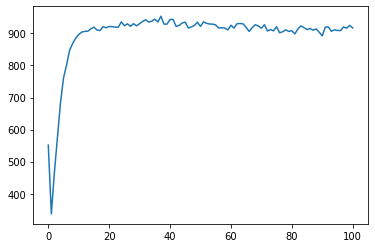

In [107]:
policy_D=[]
imd=immunD(adj,200)
for i in range(10):
    G = nx.Graph(g)
    res=policyD(beta1,delta1,adj,t,c,200,G,imd)
    policy_D.append(res)
policy_D=np.array(policy_D)
policy_D=np.mean(policy_D, axis=0)

plt.plot(policy_D)
plt.show()